In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 100
pd.options.display.max_columns = 1000

In [3]:
dropped = pd.read_csv('csv-data/clean.csv').drop(['Unnamed: 0'], axis=1)
dropped

,Country,RemoteWork,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,OrgSize,PurchaseInfluence,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,MiscTechHaveWorkedWith,ToolsTechHaveWorkedWith,IDEsHaveWorkedWith,OfficeStackAsyncHaveWorkedWith,OfficeStackSyncHaveWorkedWith,OpSysPersonal use,OpSysProfessional use,VersionControlSystem,VCInteraction,Blockchain,SOAccount,MentalHealth,ICorPM,ProfessionalTech,ConvertedCompYearly,TYPE
0,Israel,Fully remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,100 to 499 employees,I have some influence,C#;JavaScript;SQL;TypeScript,Microsoft SQL Server,NaN,ASP.NET;ASP.NET Core,.NET,NaN,Notepad++;Visual Studio;Visual Studio Code,Jira Work Management;Trello,Slack;Zoom,Windows,Windows,Git,Code editor;Command-line;Version control hosti...,Very unfavorable,Yes,None of the above,NaN,NaN,215232.0,"Developer, full-stack"
1,Netherlands,"Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",On the job training;Coding Bootcamp,NaN,NaN,6,I don’t know,I have little or no influence,NaN,NaN,NaN,NaN,NaN,NaN,Emacs;Notepad++,Confluence;Jira Work Management,Microsoft Teams,Windows,Windows,Git,Command-line;Dedicated version control GUI app...,Very unfavorable,Yes,"Or, in your own words:",Independent contributor,Innersource initiative;DevOps function;Microse...,49056.0,"Developer, back-end"
2,United States of America,Fully remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,NaN,12,20 to 99 employees,I have some influence,C#;HTML/CSS;JavaScript;PowerShell;Python;Rust;SQL,Couchbase;CouchDB;Microsoft SQL Server;MongoDB...,AWS;Microsoft Azure,ASP.NET;ASP.NET Core ;Express;Node.js;Vue.js,.NET;Keras;NumPy;Pandas;Scikit-learn;TensorFlo...,Docker;Homebrew;Kubernetes,IPython/Jupyter;Neovim;Visual Studio;Visual St...,Confluence;Jira Work Management;Notion;Trello,Cisco Webex Teams;Google Chat;Microsoft Teams;...,Linux-based;macOS,Linux-based;macOS;Windows,Git,Code editor;Dedicated version control GUI appl...,Unfavorable,Yes,"I have a mood or emotional disorder (e.g., dep...",People manager,Innersource initiative;DevOps function;Microse...,194400.0,Engineering manager
3,United States of America,"Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","School (i.e., University, College, etc)",NaN,NaN,12,2 to 9 employees,I have a great deal of influence,C;HTML/CSS;Rust;SQL;Swift;TypeScript,PostgreSQL,AWS,React.js,Torch/PyTorch,Docker,Vim;Visual Studio,Jira Work Management;Trello,Microsoft Teams;Slack;Zoom,Linux-based,macOS,Git,Code editor;Command-line,Favorable,Not sure/can't remember,None of the above,Independent contributor,DevOps function;Microservices,65000.0,"Developer, full-stack"
4,Czech Republic,"Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,Udemy;Codecademy,7,2 to 9 employees,I have some influence,C#;Java;PHP;Python;R,Elasticsearch;MySQL,Google Cloud;VMware,Angular;Laravel;Node.js;React.js;Vue.js,Electron;React Native,Docker;npm,IntelliJ;Notepad++;Visual Studio Code,Jira Work Management;Trello,Microsoft Teams;Slack,Windows,Windows,Git,Command-line;Dedicated version control GUI app...,Unfavorable,Yes,"I have a mood or emotional disorder (e.g., dep...",NaN,NaN,19224.0,"Developer, full-stack"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14298,Poland,"Hybrid (some remote, some in-person)",Some college/university study without earning ...,Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,Udemy;edX,5,500 to 999 employees,I have little or no influence,Java;Scala;TypeScript,PostgreSQL,A

In [4]:
def splitter(x: str):
    return x.split('(')[0].rstrip()

In [5]:
def encode_multichoices(dataseries, column, i=0):
    df = pd.DataFrame(dataseries[column])
    df = df[column].str.get_dummies(sep=';')
    df = df.drop(['Other (Please specify):'], axis=1, errors='ignore')
    df = df.drop(['Other (please specify):'], axis=1, errors='ignore')
    df.columns = list(map(splitter, df.columns))  
    return df

In [ ]:
#pip install dython

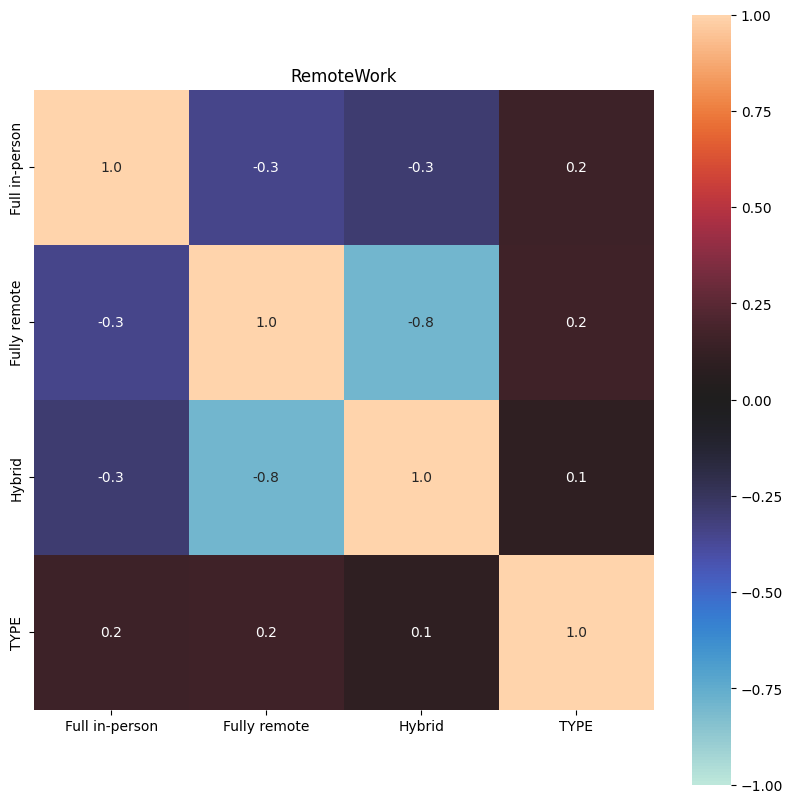

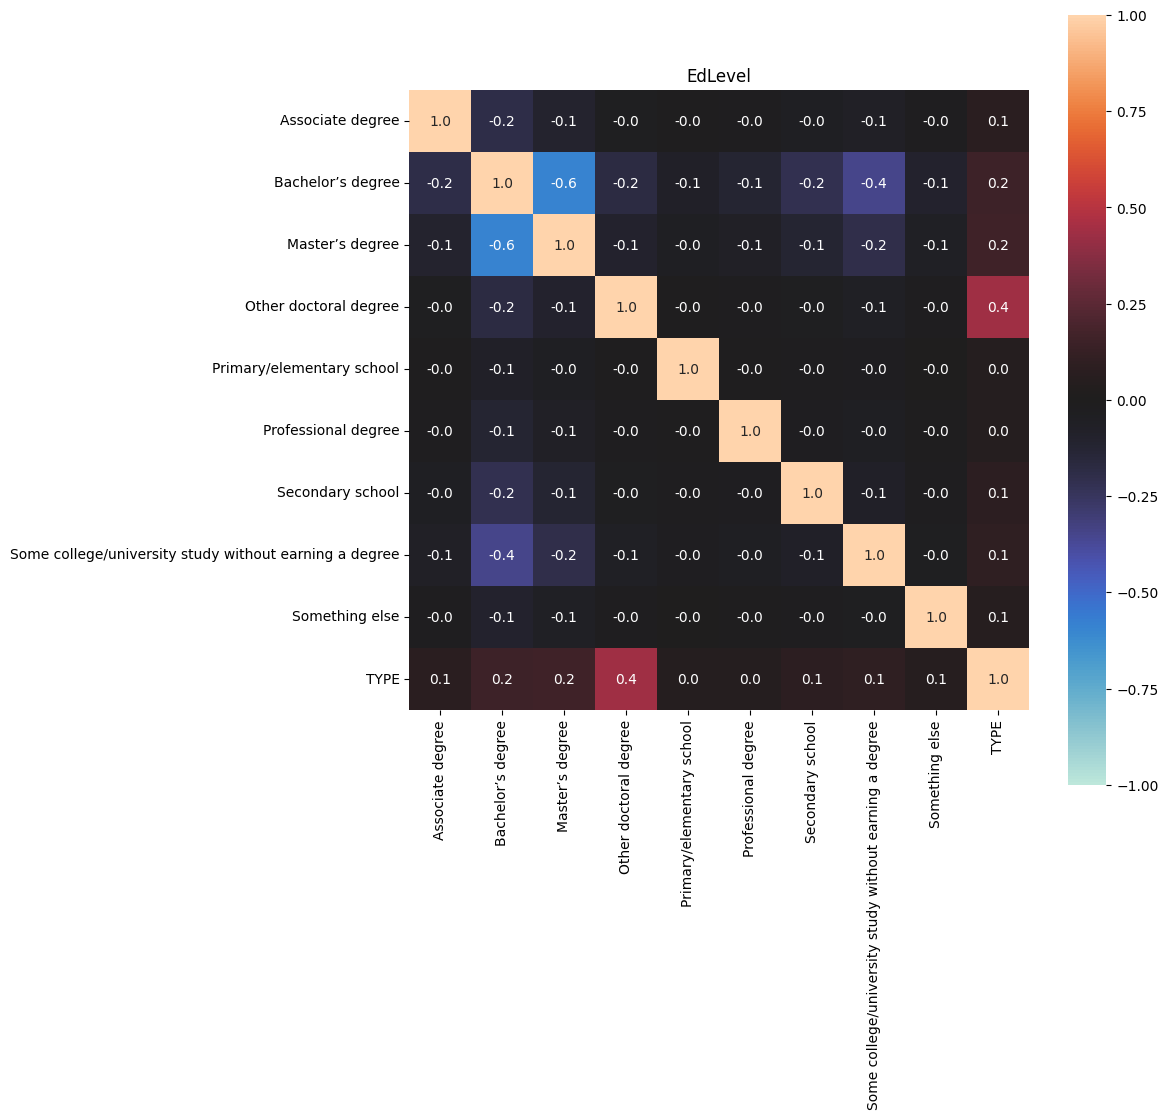

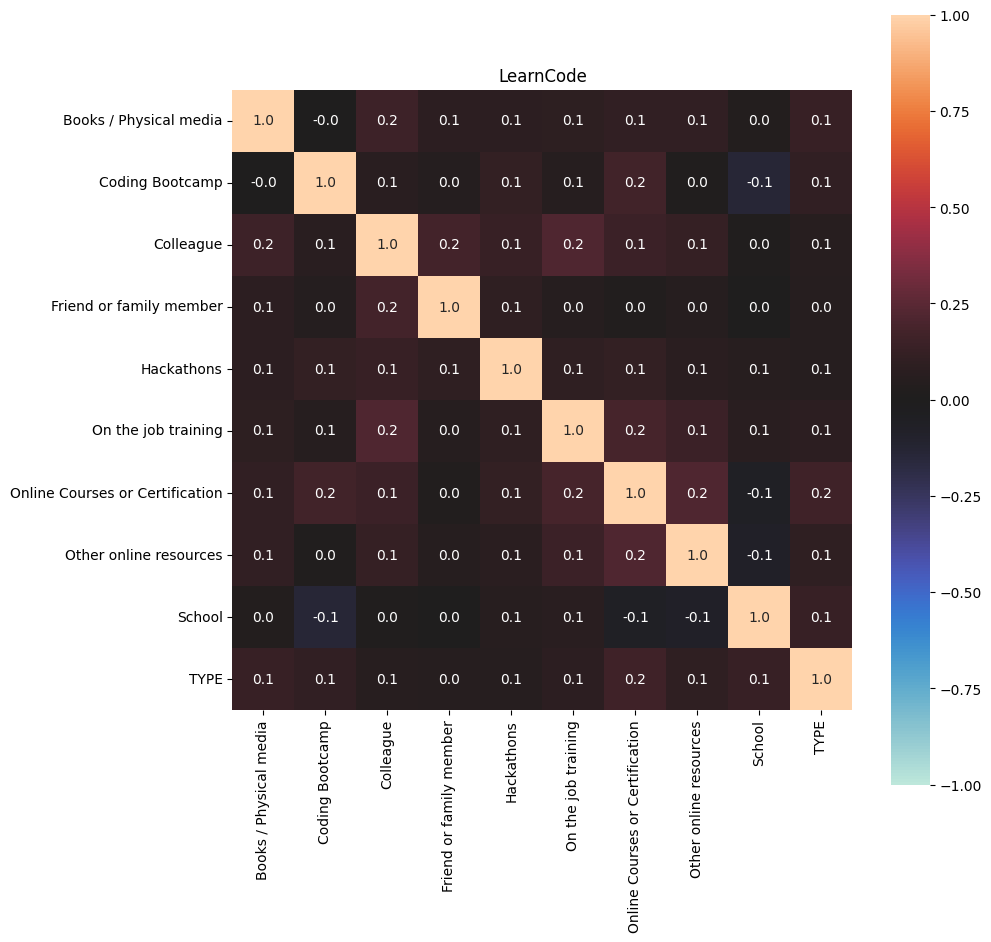

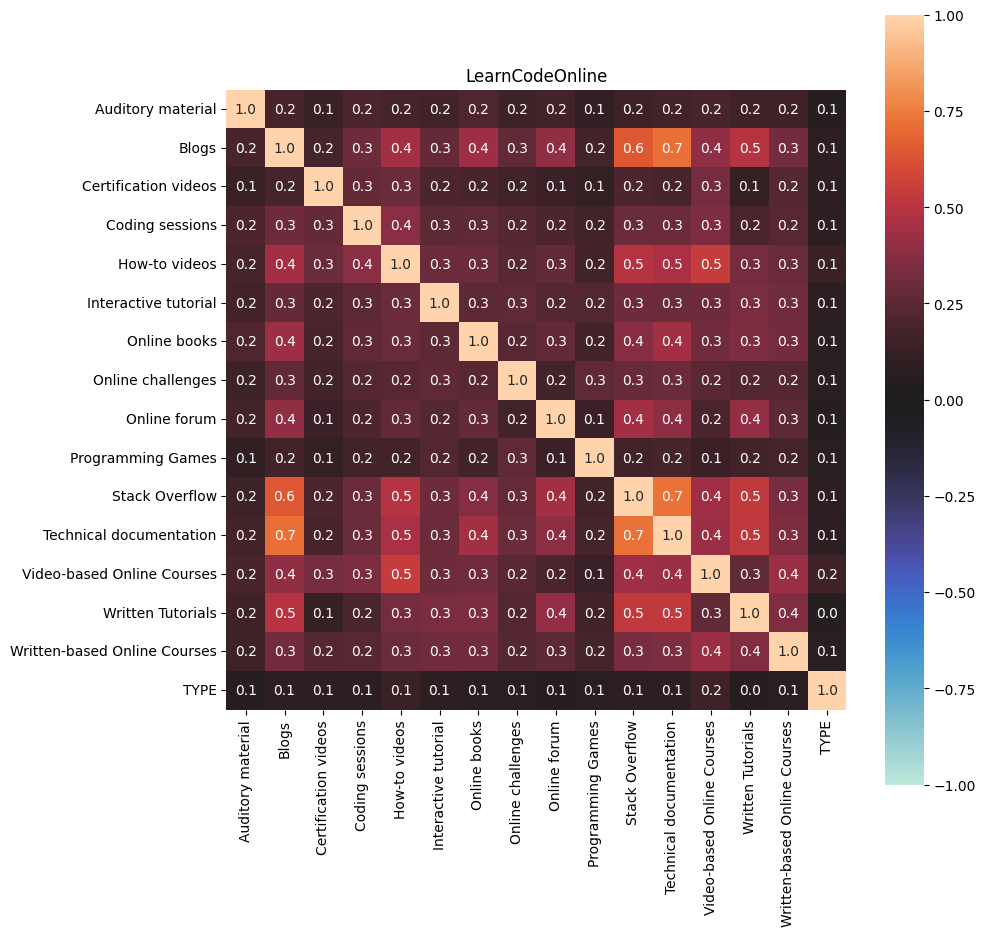

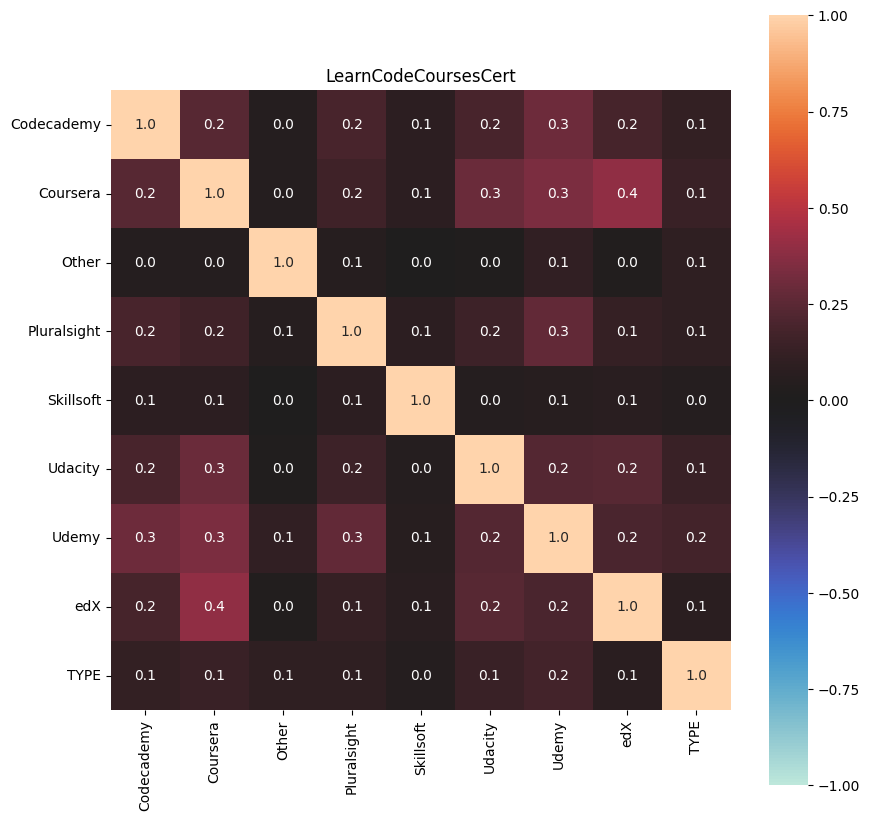

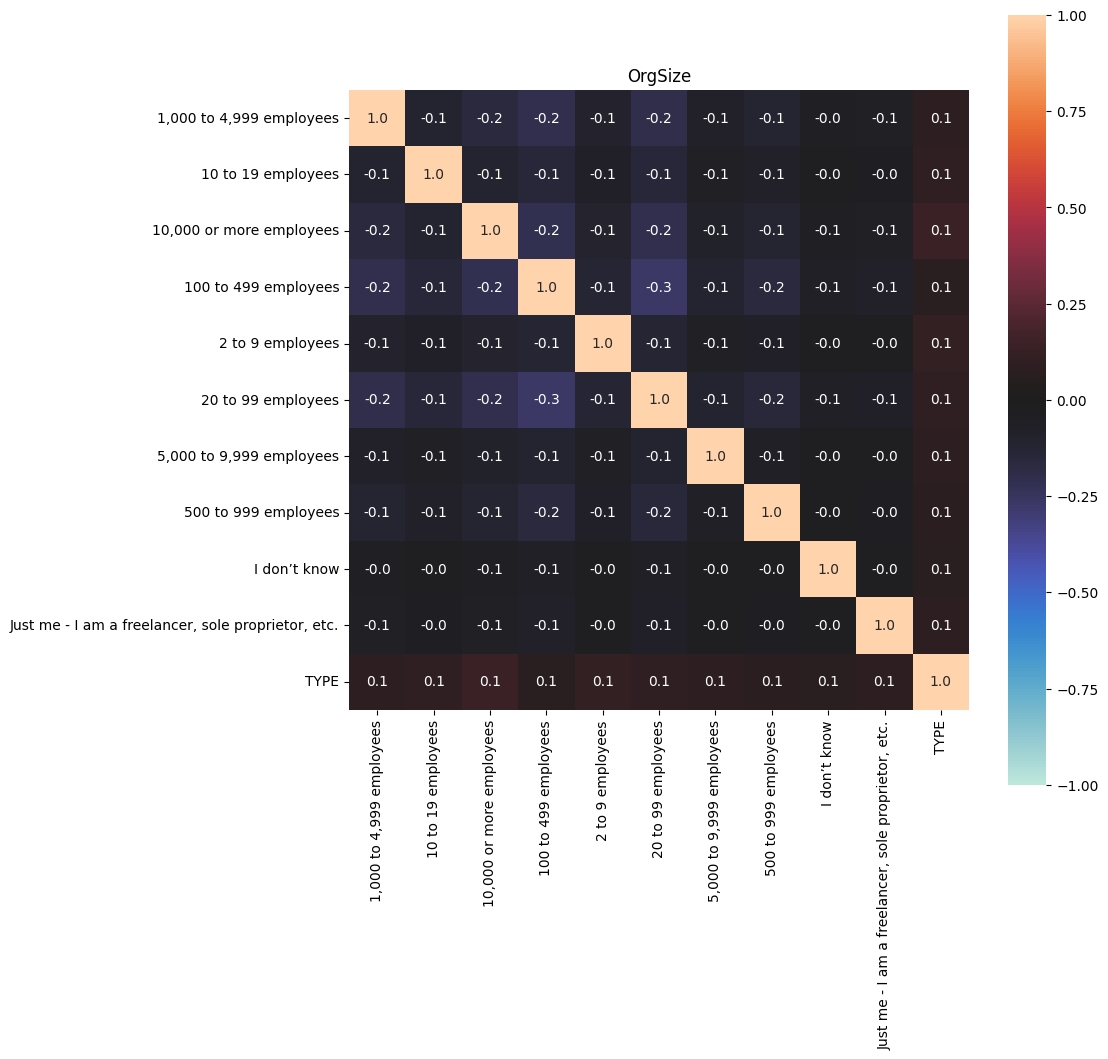

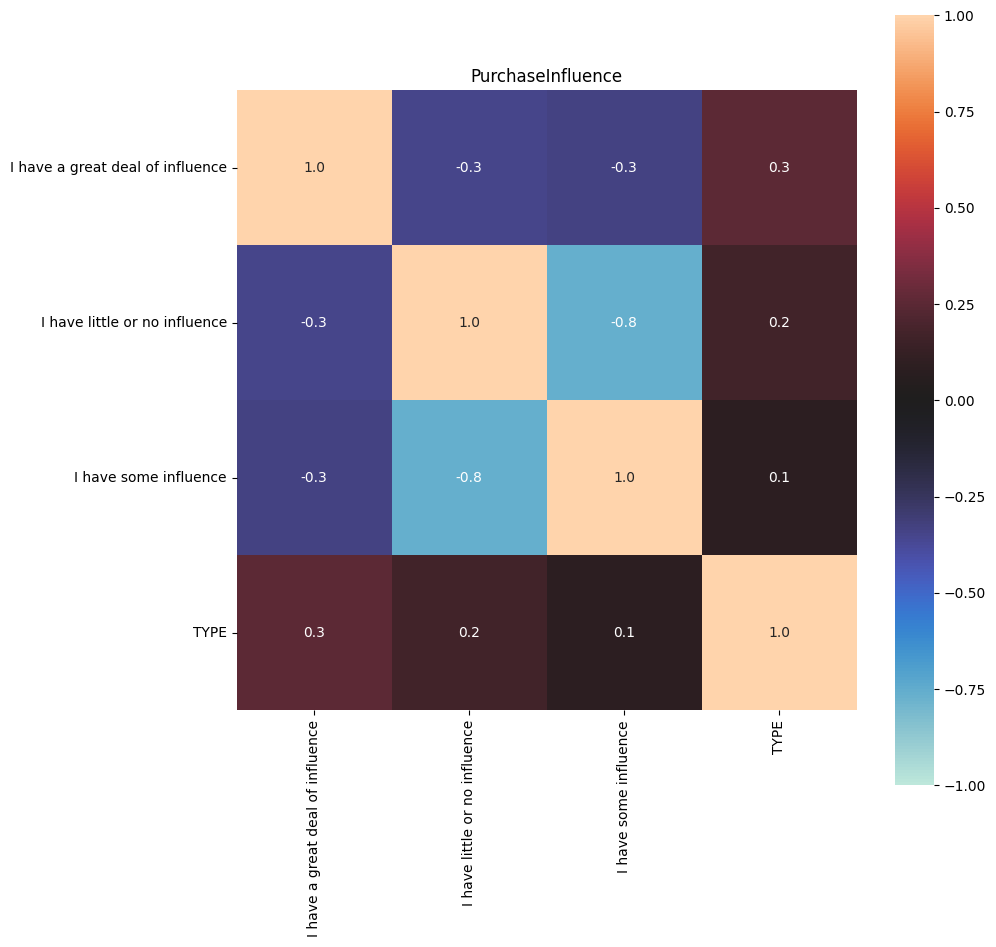

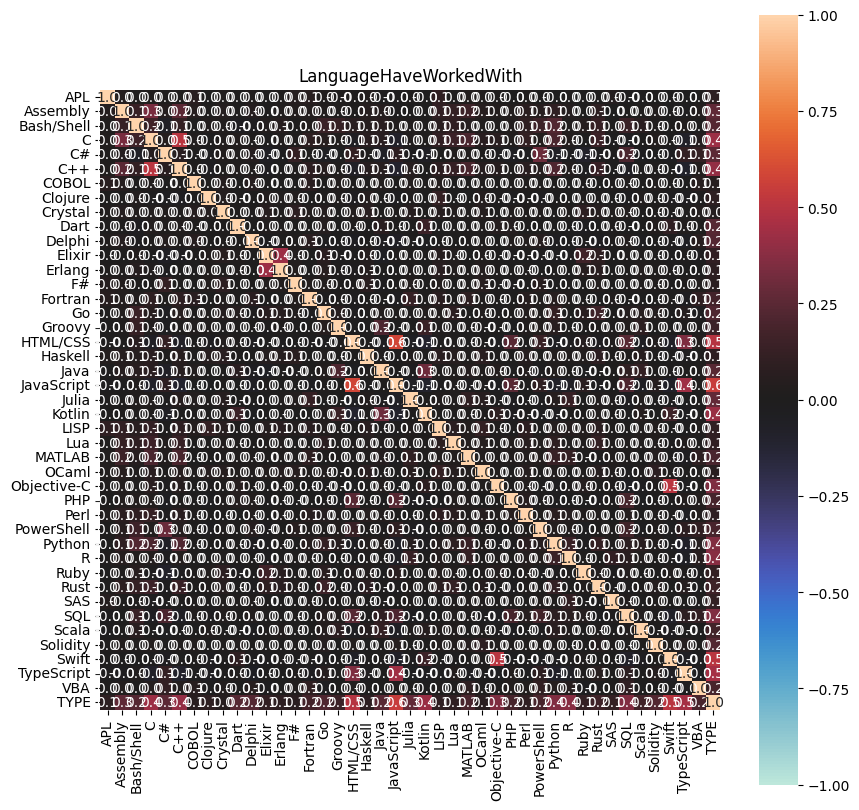

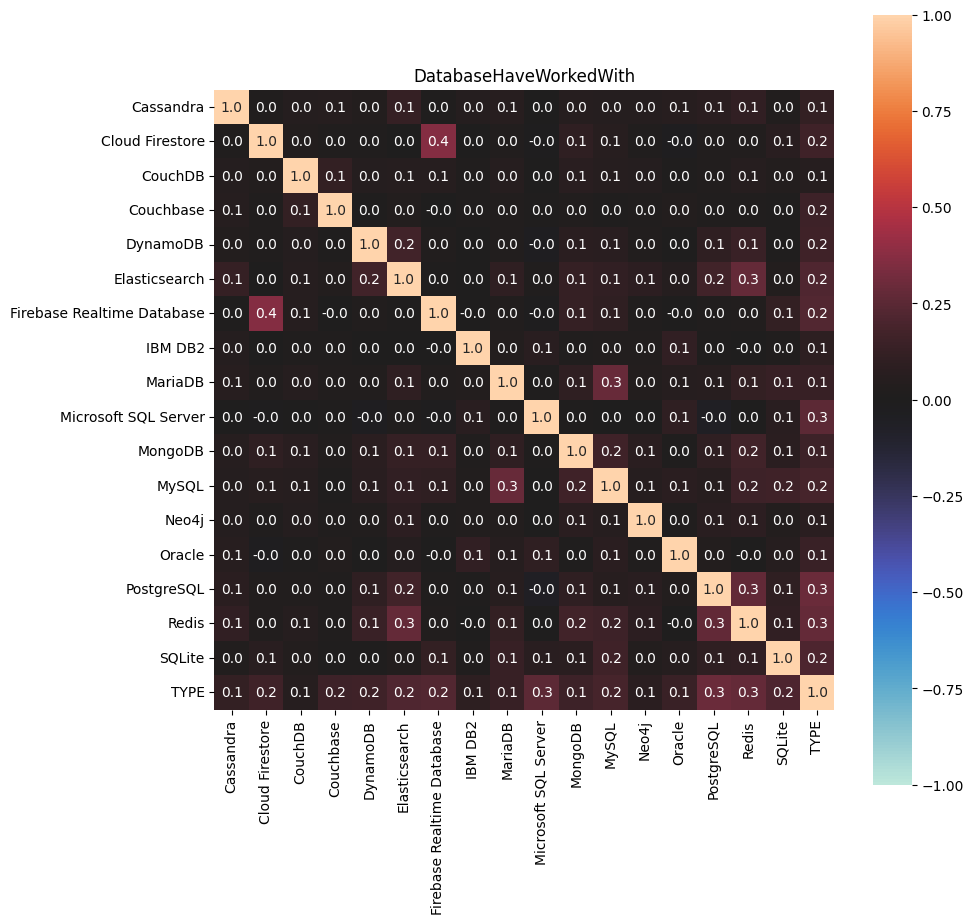

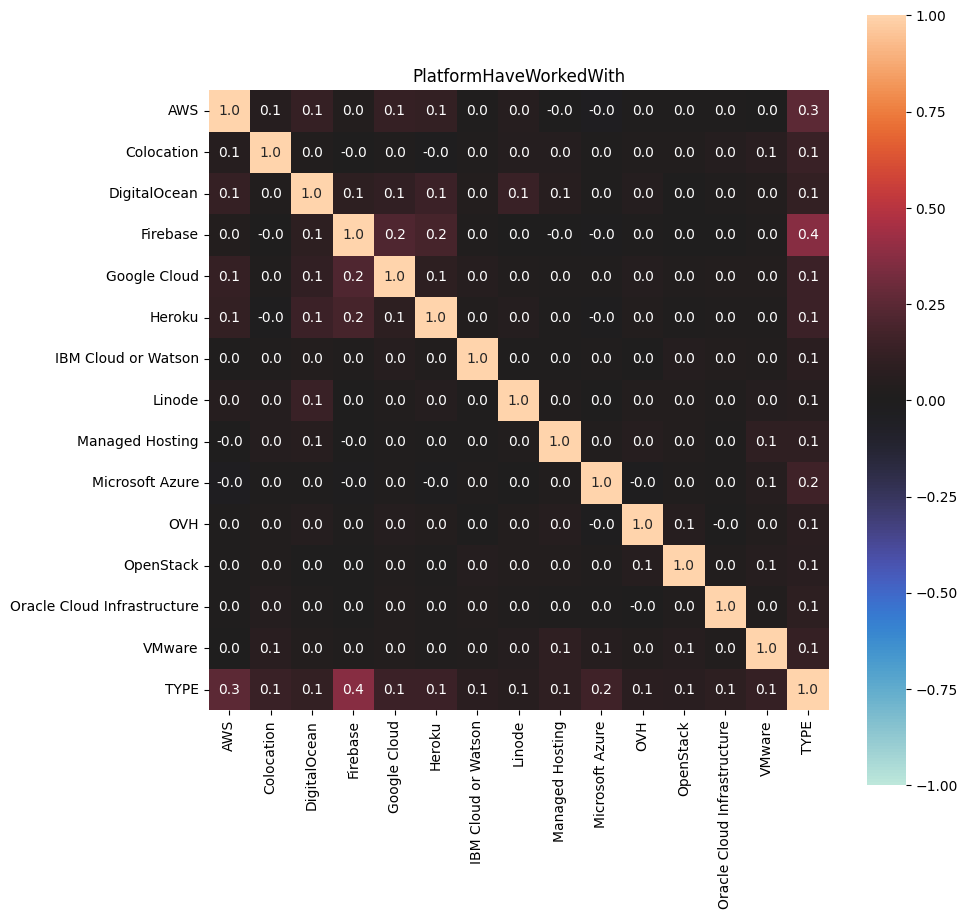

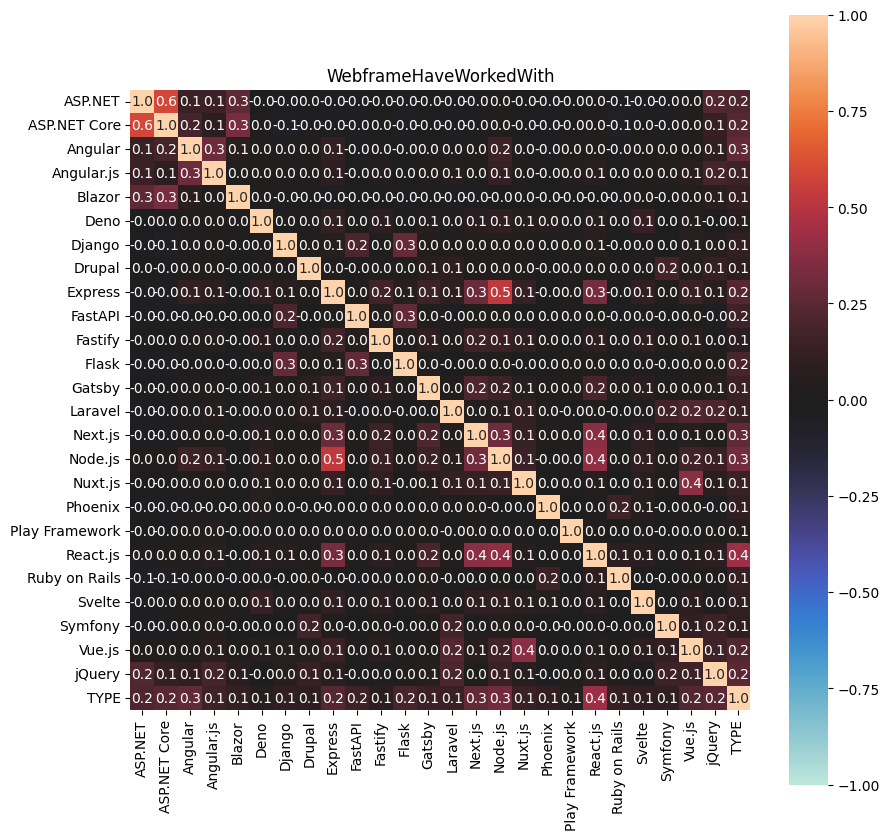

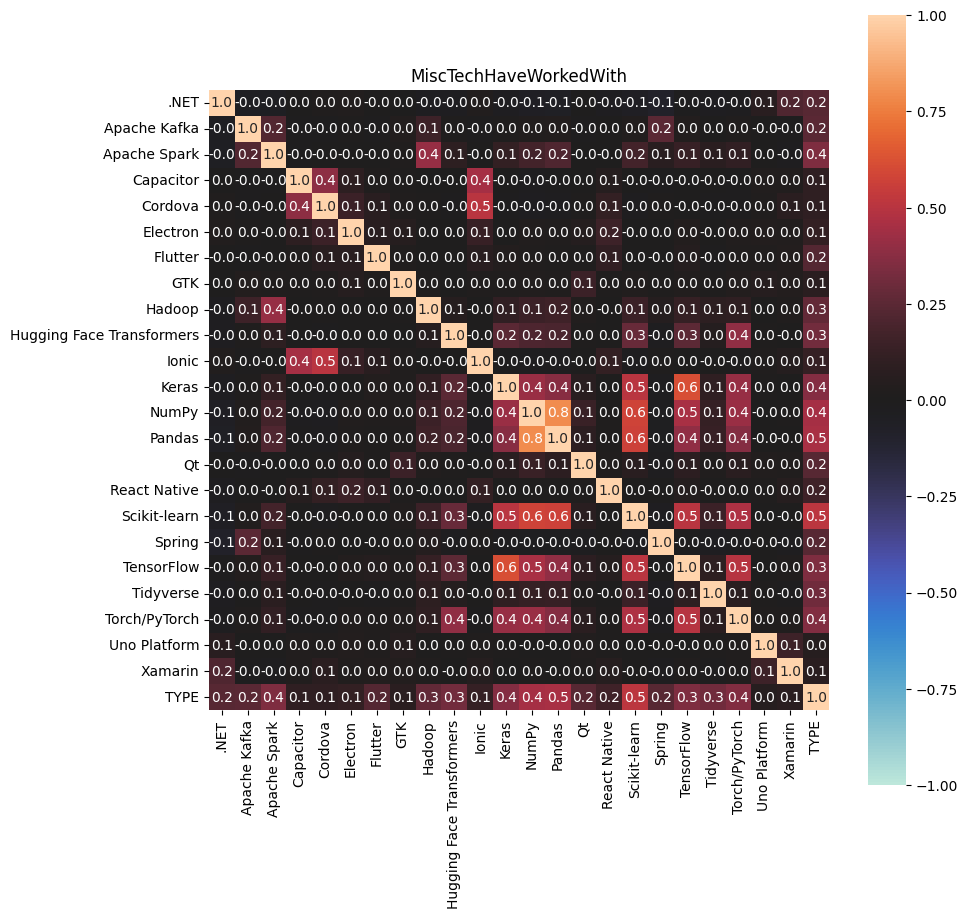

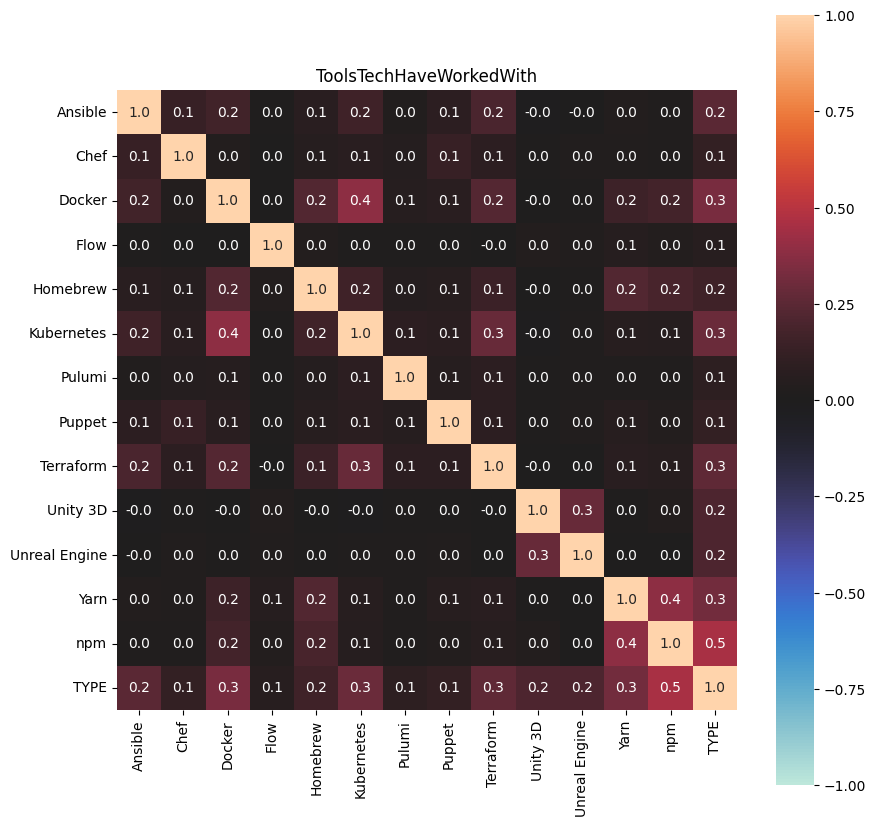

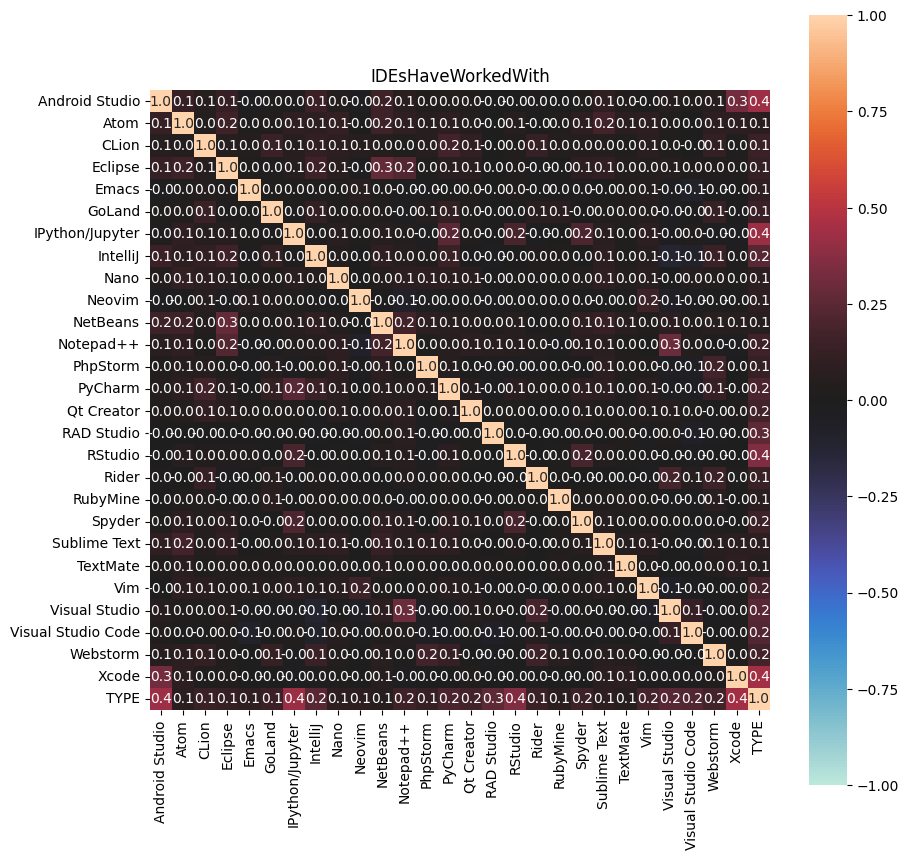

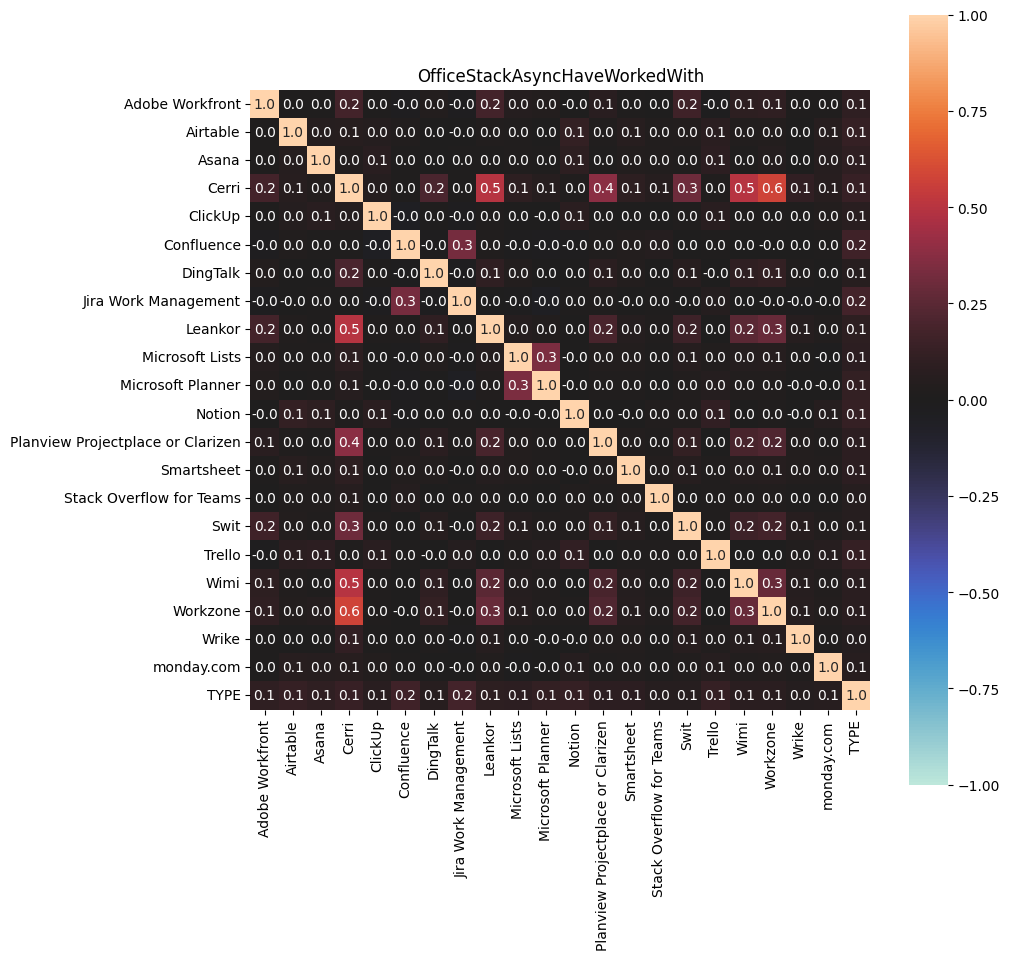

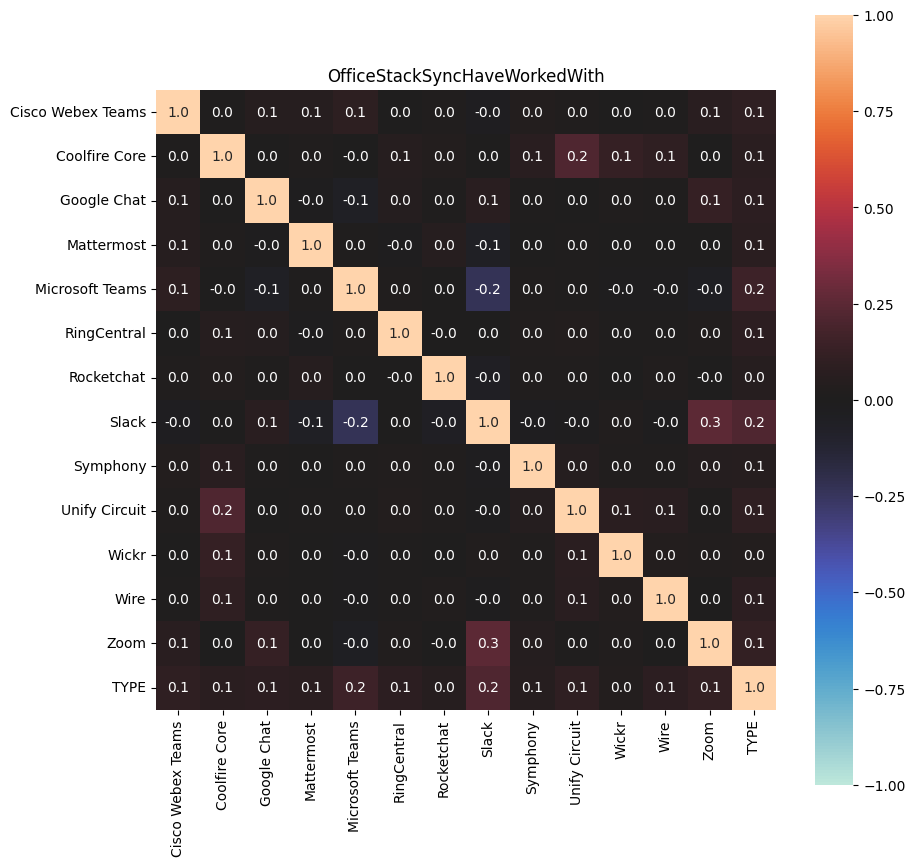

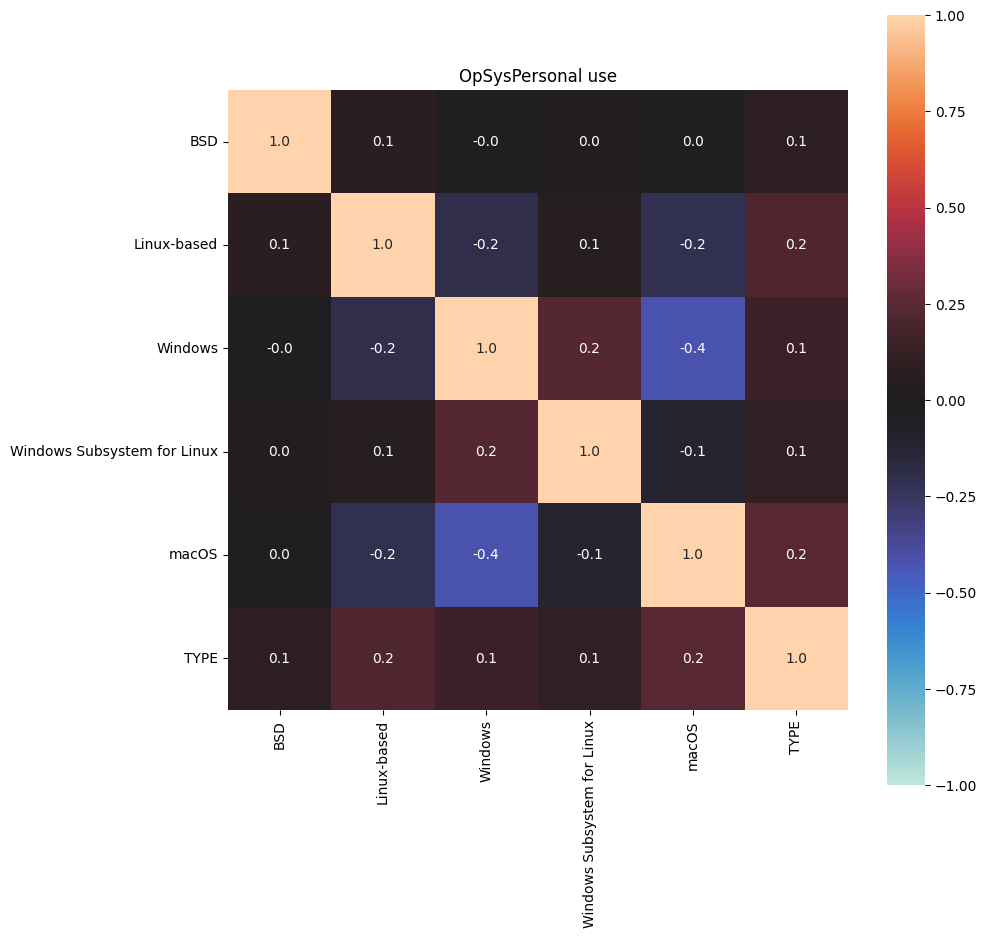

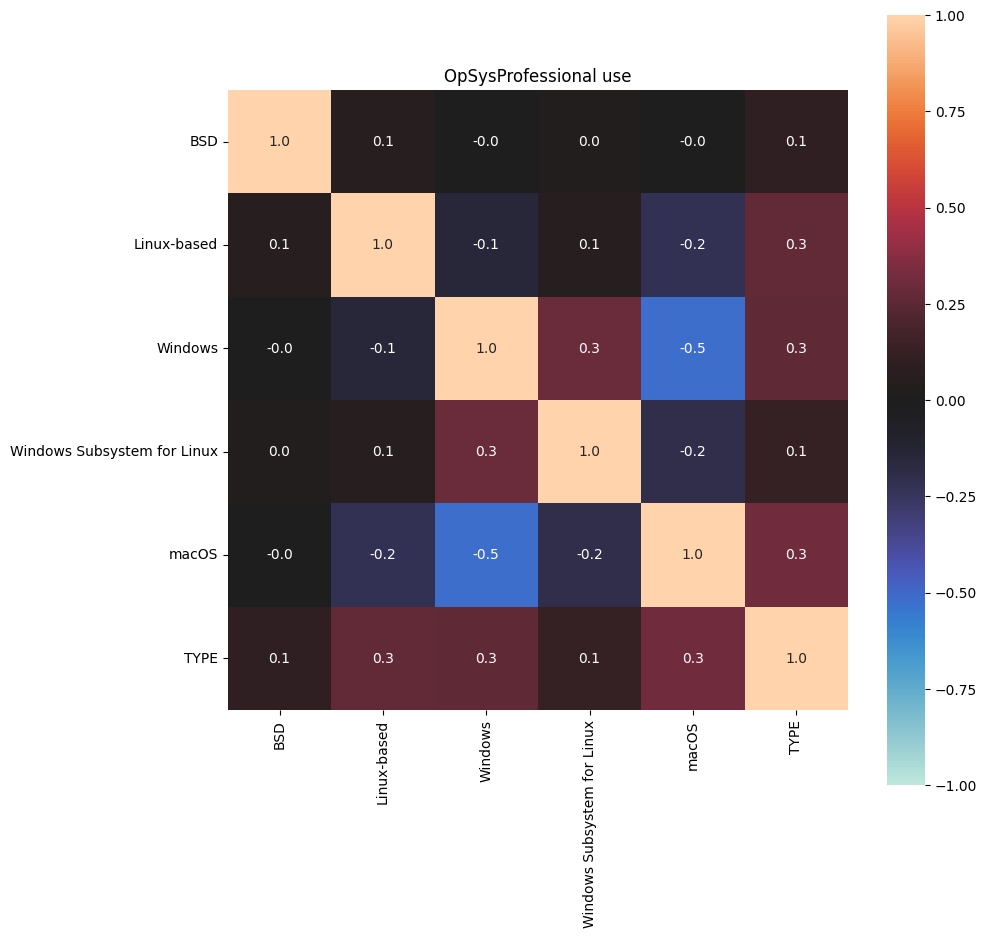

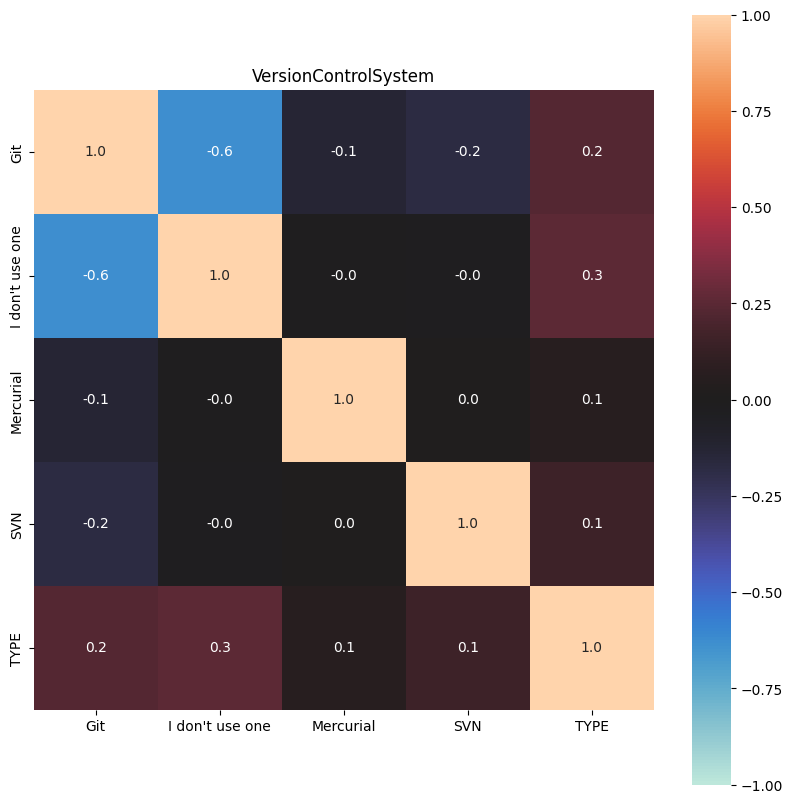

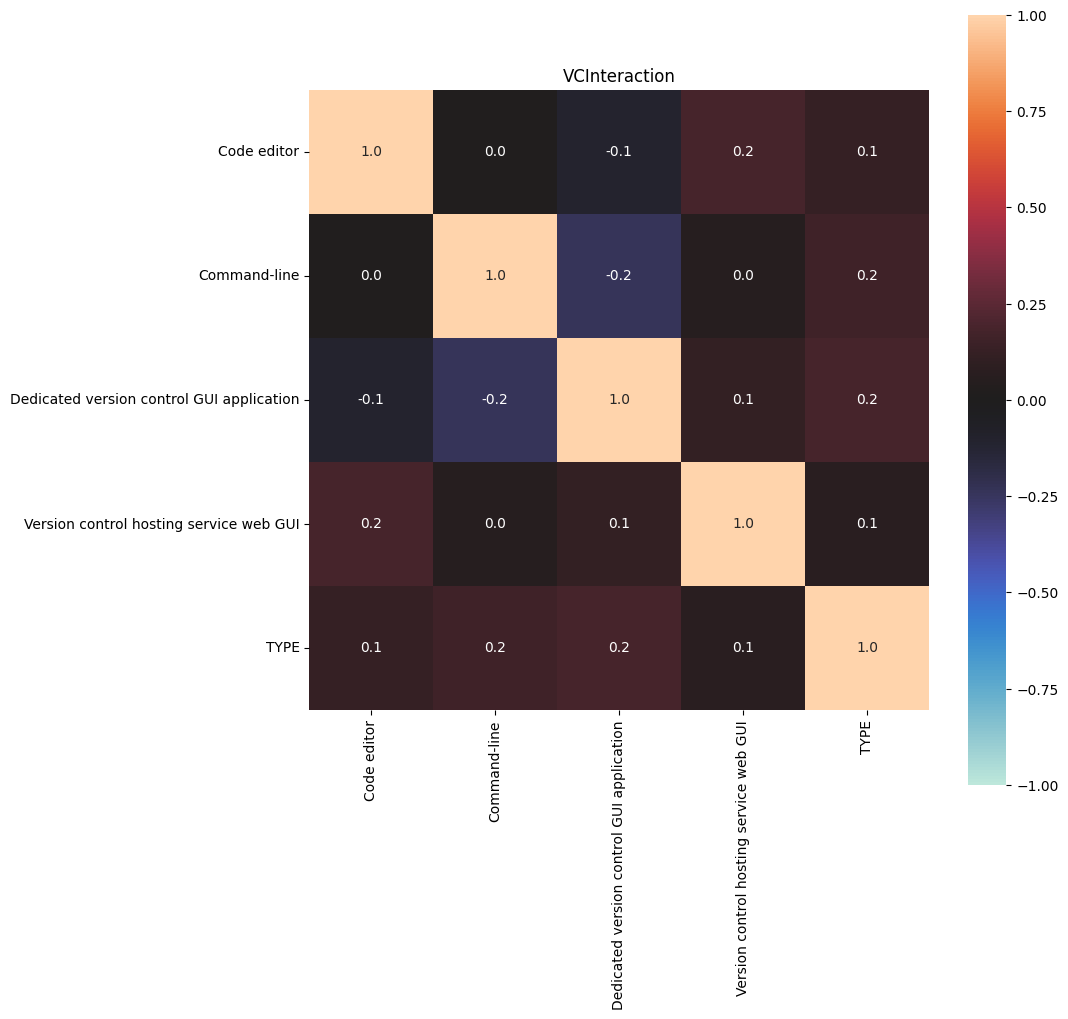

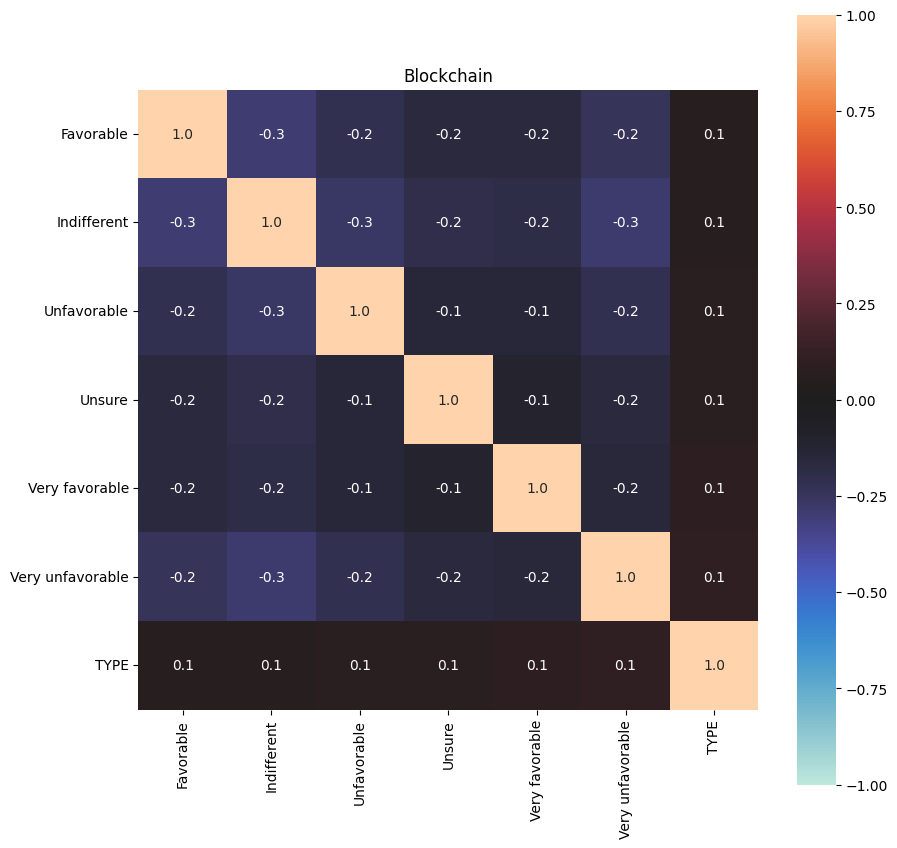

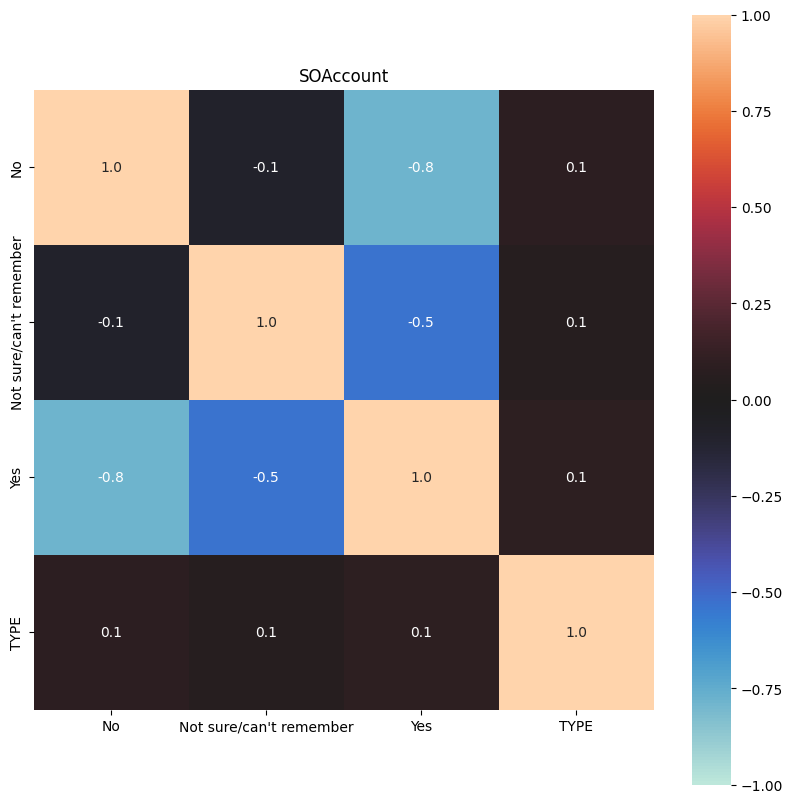

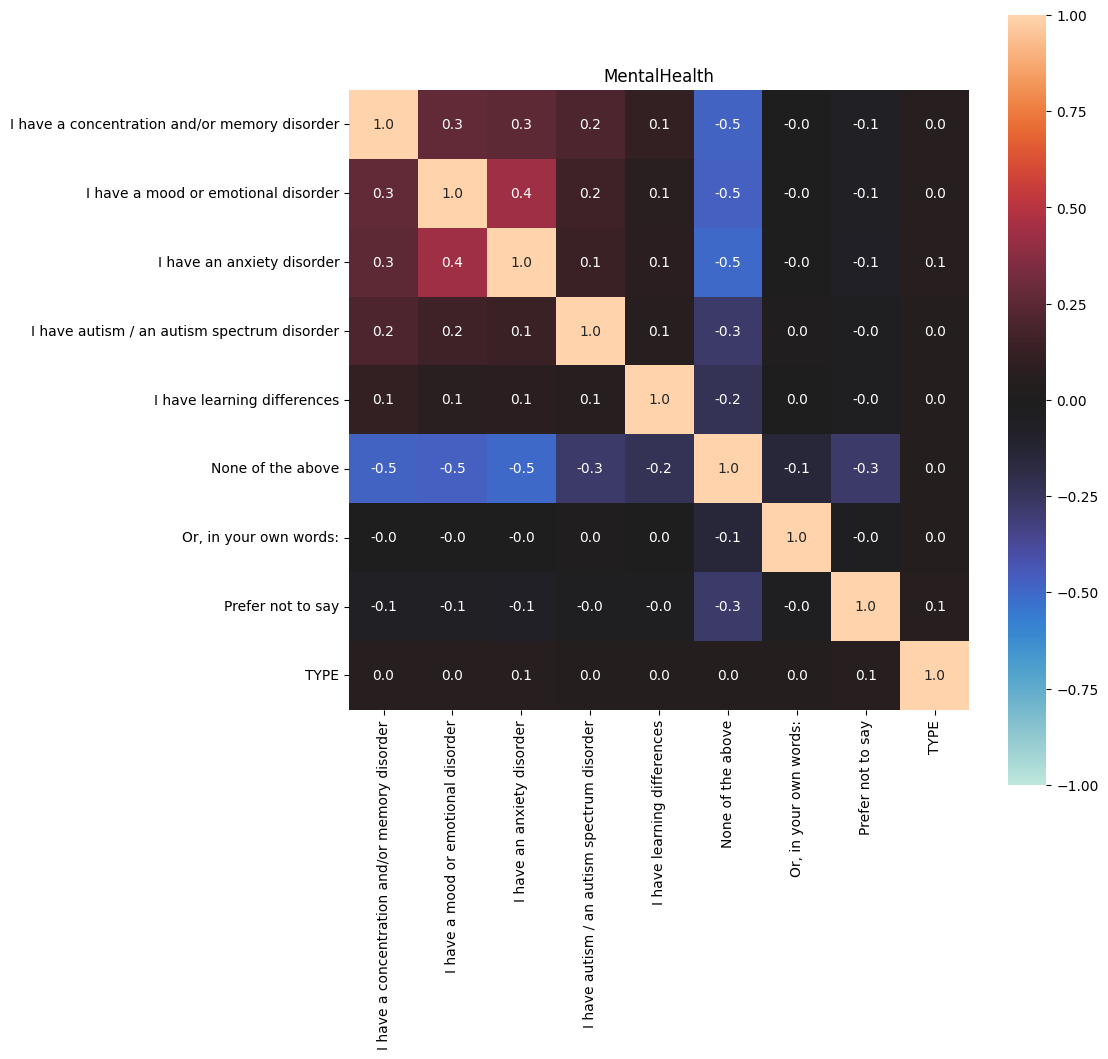

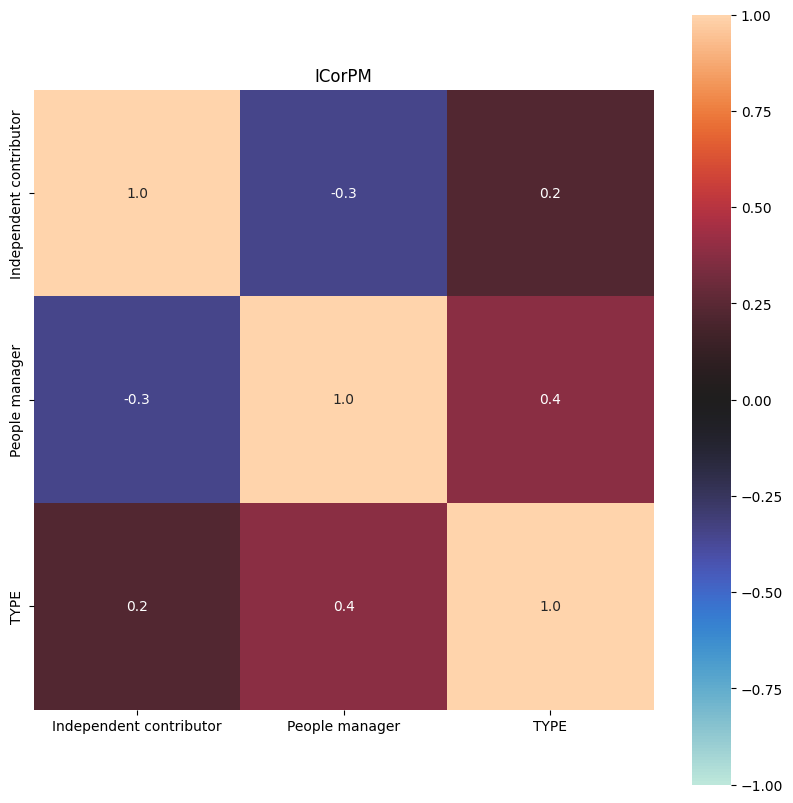

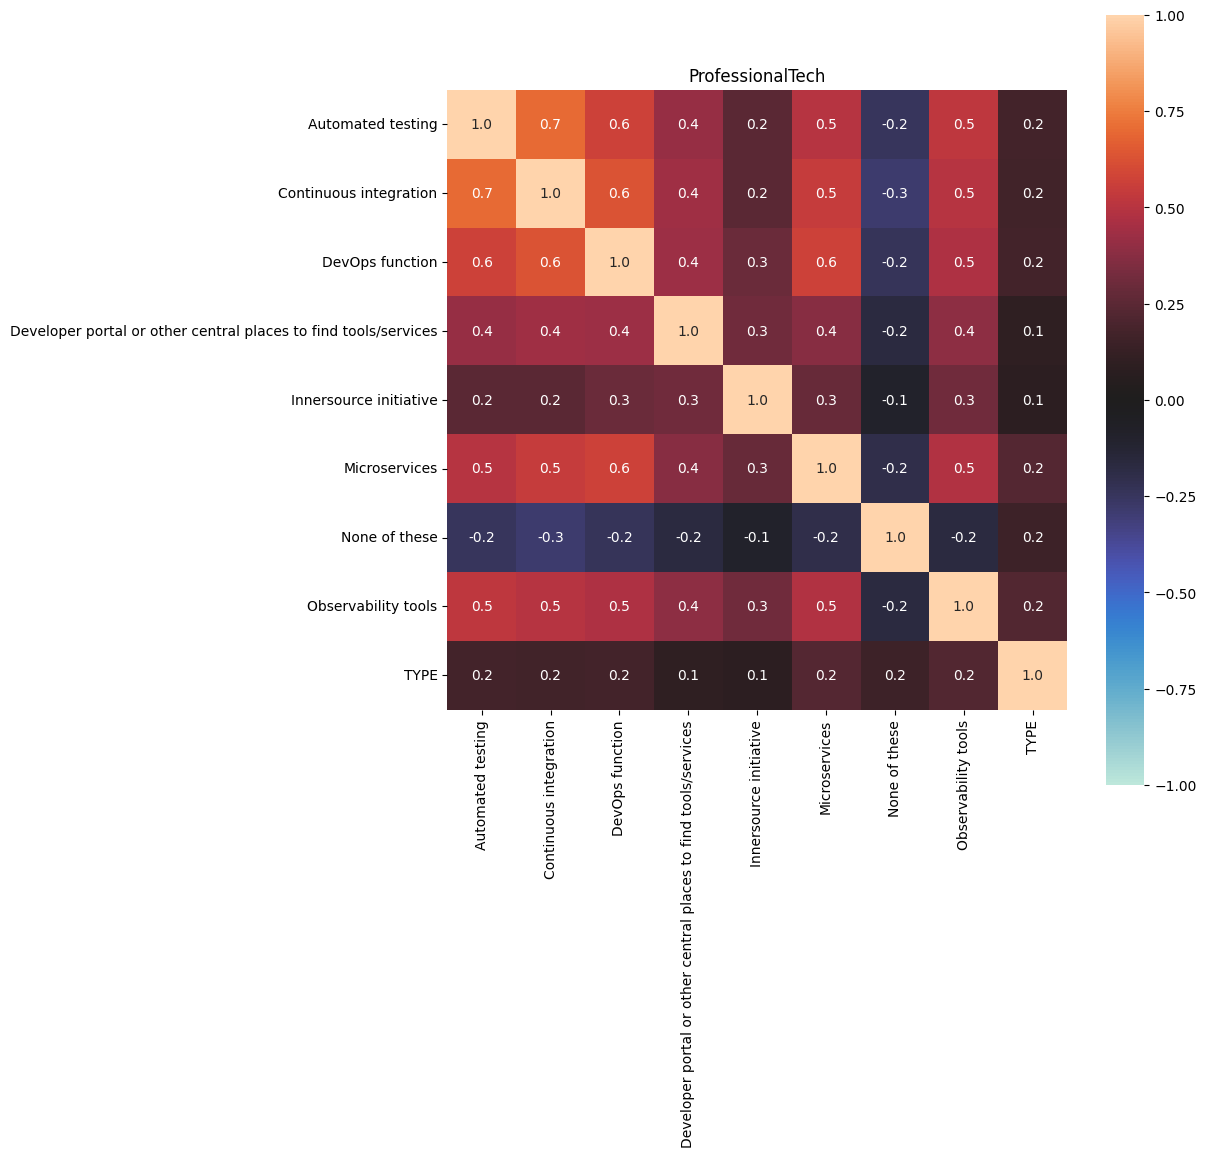

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from dython.nominal import associations
y = dropped['TYPE']
for col in dropped.select_dtypes(object).columns:
    if col in ['Country', 'TYPE']:
        continue
    encoded = encode_multichoices(dropped, col)
    # heatmaps for checking for multicoll
    associations(pd.concat([encoded, y], axis=1), figsize=(10,10), fmt='.1f', title=col) 